# ESAME BILOSI GAIA - Esercizio Fit NFW density profile

# PRIMA PARTE

In questa prima parte viene richiesto di implementare la funzione per calcolare Σ(R,M,c,z), e mostrare in un grafico composto da 9 pannelli i profili di densità utilizzando le seguenti informazioni:

- R appartiene all'intervallo [0.03,1.0] Mpc,
- M = [$10^{13.5}$,$10^{14}$,$10^{15}$] M☉
- c = [2,5,10]
- z = 0.0

Si è usata una scala logaritmica per migliorare la visualizzazione

In [3]:
#Installo tutte le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# Definisco la funzione: essa dipende dai valori di raggio, massa, concentrazione e redshift
# Si tratta del cosiddetto profilo di Navarro-Frenk-White 
 
def calcola_profilo_densita(R, M, c, z): 
    
  # Definisco le costanti fornite
  rho_m = 0.286 * 0.7**2 * (2.7751428946 * 10**11)  # Densità media dell'universo approx.[M☉/(Mpc)^3]
  f_c = math.log(1 + c) - (c / (1 + c)) 
  delta_char = 200 * c**3 / (3 * f_c)  # Sovradensità caratteristica
  rho_s = rho_m * (1 + z)**3 * delta_char  # Densità caratteristica dell'ammasso [M☉/(Mpc)^3]

  # Calcolo il raggio caratteristico dell'ammasso, misurato in [Mpc]
  r_s = 1 / c * (3 * M / (4 * np.pi * 200 * rho_m * (1 + z)**3))**(1 / 3)

  # Calcolo la funzione f(x) definita a tratti con una funzione di numpy np.piecewise
  x = R / r_s
  f_x = np.piecewise(x, [x < 1, x == 1, x > 1],
                       [lambda x: (1 - (2 * np.arctanh(np.sqrt((1 - x) / (1 + x)))) /
                                   (np.sqrt(1 - x**2))) / (x**2 - 1),
                        1/3,
                        lambda x: (1 - (2 * np.arctan(np.sqrt((x - 1) / (1 + x)))) /
                                   (np.sqrt(x**2 - 1))) / (x**2 - 1)])
  

   # Calcolo e restituisco il profilo di densità, [M☉/(Mpc)^2]
  Sigma = 2 * r_s * rho_s * f_x
  return Sigma

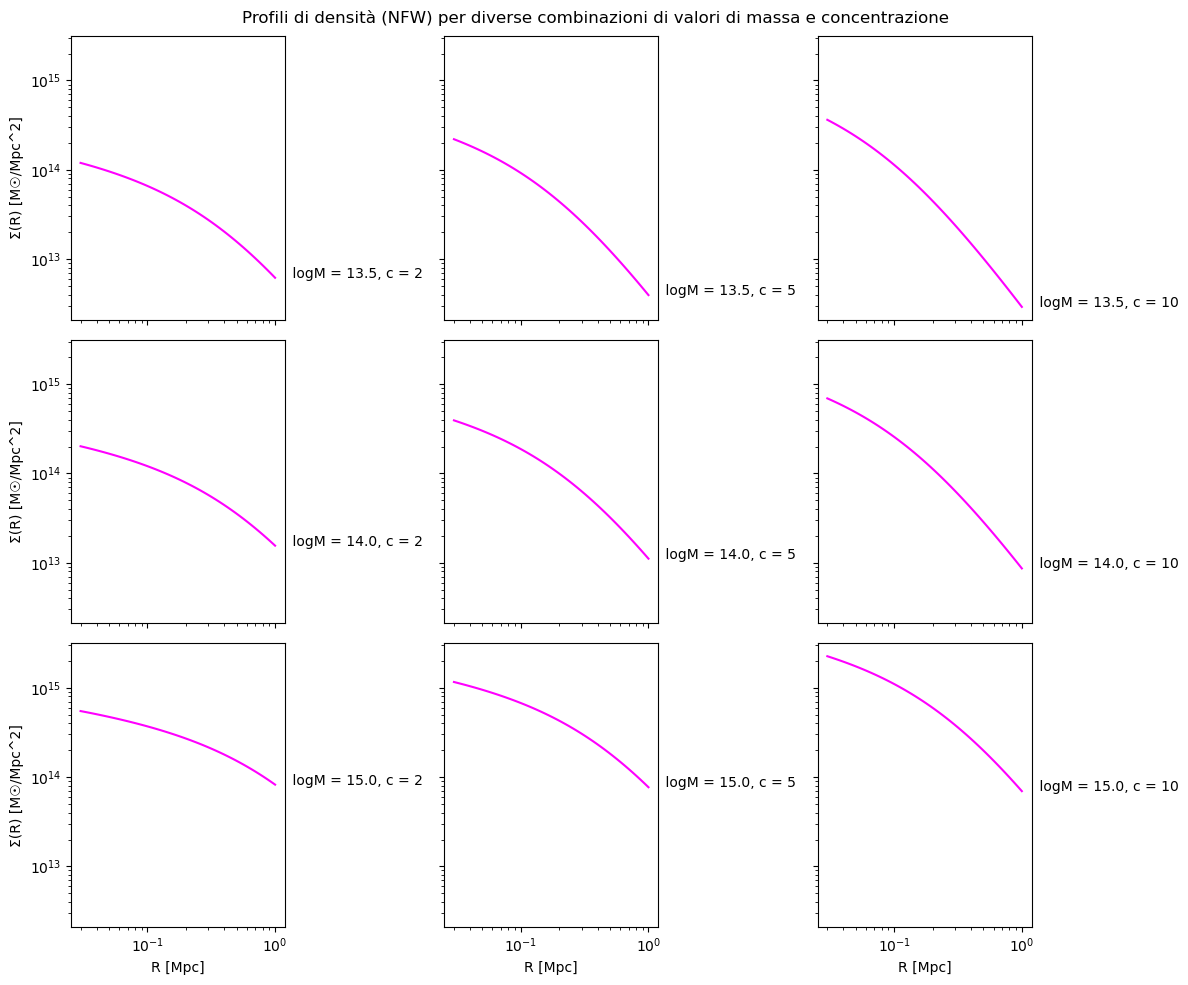

In [5]:
# Definisco i valori di massa, concentrazione e redshift
valori_M = [10**13.5, 10**14.0, 10**15.0] # Calcolate in M☉
valori_c = [2, 5, 10]
z = 0.0  # Il redshift è fissato a zero

# Definisco il raggio nel suo intervallo logaritmico
valori_R = np.logspace(np.log10(0.03), np.log10(1.0), base = 10) # distanza dal centro dell'alone di materia oscura [Mpc]

# Ora plotto tutto, in un grafico a 9 pannelli
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), sharex=True, sharey=True) 

# Calcolo e visualizzo i profili di densità
for i, M in enumerate(valori_M):
  for j, c in enumerate(valori_c):
    Sigma = calcola_profilo_densita(valori_R, M, c, z)
    axes[i, j].loglog(valori_R, Sigma, base=10, color = 'magenta', label=f'M={M:.1e}, c={c}')
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None) # aumento spazio tra i subplots
   
    axes[i, j].annotate(f"    logM = {np.log10(M)}, c = {c}", (valori_R[-1], Sigma[-1]), xycoords='data', color='black', fontsize=10) # nomino la funzione

# Aggiungo etichette e titoli al grafico
for i in range(3):
  axes[i, 0].set_ylabel('Σ(R) [M☉/Mpc^2]')
  axes[2, i].set_xlabel('R [Mpc]')

# Imposto il titolo
plt.suptitle('Profili di densità (NFW) per diverse combinazioni di valori di massa e concentrazione')

# Visualizzo il grafico
plt.tight_layout()
plt.show()

# COMMENTO

Nel grafico a 9 pannelli, vengono visualizzate diverse combinazioni di tre valori di massa (M, misurata in M☉) e concentrazione (c), mostrando il comportamento della densità superficiale Σ in funzione del raggio (R) su una scala logaritmica. 

L'analisi dei grafici suggerisce che l'implementazione della funzione Σ(R, M, c, z) sia corretta, poiché il grafico segue l'andamento previsto per il profilo di densità. La funzione Σ(R) [M☉/Mpc^2] presenta una leggera decrescita, confermando, come indicato dalle formule, che la densità è inversamente proporzionale al valore di R.

Inoltre, viene confermata la dipendenza dalla concentrazione e dalla massa. A parità di logM, aumentando il valore di c (osservando i grafici sulla stessa fascia orizzontale da sinistra verso destra), si osserva una traslazione verso l'alto del profilo di densità. Allo stesso modo, a parità di concentrazione, aumentando la massa (osservando i grafici in verticale dall'alto verso il basso), la curva tende ad appiattirsi e raddrizzarsi progressivamente.

_NOTA TEORICA_:

Il profilo di Navarro-Frenk-White (NFW) rappresenta una formulazione analitica della distribuzione radiale della densità di materia oscura all'interno degli aloni cosmologici. Concepito nel 1996 da tre scienziati, il profilo NFW rimane uno dei modelli più ampiamente utilizzati per caratterizzare la distribuzione di materia oscura nelle strutture cosmologiche.

Questo modello trova impiego frequente nella descrizione delle simulazioni cosmologiche, contribuendo alla comprensione della formazione delle strutture cosmiche e svolgendo un ruolo cruciale nella modellizzazione delle lenti gravitazionali.

Tuttavia, è importante notare che sebbene il profilo NFW possa essere in accordo con le osservazioni di galassie luminose come la Via Lattea e la Galassia di Andromeda, tale modello potrebbe non risultare coerente con le osservazioni di galassie caratterizzate da una bassa brillanza superficiale.